In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\jneed\Documents\projets\z_now\classifier\authorized_embeddings.csv")
# Utilisation des embeddings du DataFrame
features_extracted = df.drop('target', axis=1).values

In [3]:
# K-means pour créer des clusters
kmeans = KMeans(n_clusters=8, random_state=0)
clusters = kmeans.fit_predict(features_extracted)

c:\Users\jneed\Documents\projets\z_now\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


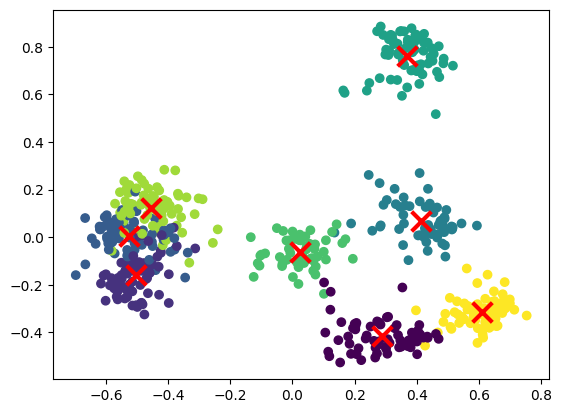

In [4]:
# Reduce the dimensionality of your data to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_extracted)

# Scatter plot of the reduced data
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=clusters)

# Mark cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker='x', s=200, linewidths=3, color='r')

plt.show()

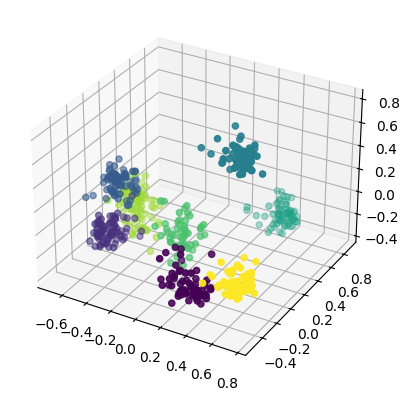

In [5]:

# Reduce the dimensionality of your data to 3 dimensions using PCA
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features_extracted)


# Create a 3D scatter plot of the reduced data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=clusters)
ax.set_title("3D Scatter Plot of authorized faces embeddings")
plt.show()

In [ ]:
# !pip install plotly

In [7]:
import plotly.graph_objects as go

# Create a 3D scatter plot of the reduced data
fig = go.Figure(data=[go.Scatter3d(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    z=reduced_features[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color=clusters,         # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# Add labels and title
fig.update_layout(scene = dict(
                    xaxis_title='Principal Component 1',
                    yaxis_title='Principal Component 2',
                    zaxis_title='Principal Component 3'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()